## Imports

In [3]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, f1_score, precision_score, recall_score,
    confusion_matrix, ConfusionMatrixDisplay, classification_report
)
from sklearn.neural_network import MLPClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

## Define Functions

In [4]:
# define evaluation function
def evaluate(y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    conf_mat = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
    
    print("Accuracy:    ", accuracy)
    print("F1-Score:    ", f1)
    print("Precision:   ", precision)
    print("Recall:      ", recall)
    print()
    print(classification_report(y_test, y_pred))
    print()

    disp.plot()

## Load .csv into DF

In [5]:
# load data into dataframe
df = pd.read_csv("phishing_email_projectthesis.csv") 

## Prepare Data

In [6]:
# rename columns
df = df.rename(columns={'text_combined': 'content'}).rename(columns={'label': 'target'}) 

In [7]:
# drop duplicates but keep the first
df = df.drop_duplicates(keep='first') 

In [8]:
# randomized undersampling
df = df.groupby('target').apply(lambda x: x.sample(39233, replace=True)).reset_index(drop=True)

/var/folders/gr/nkq2fp191y1_3wywjp14_sz00000gn/T/ipykernel_50733/196238678.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('target').apply(lambda x: x.sample(39233, replace=True)).reset_index(drop=True)


## Split Dada into Training and Test 80-20

In [9]:
# define X and Y
X = df['content']
y = df['target']

# split data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# check the shape
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (62772,)
Shape of X_test: (15694,)
Shape of y_train: (62772,)
Shape of y_test: (15694,)


## Vektorize with TF-IDF

In [10]:
# creating vectorizer object with standart parameters
vectorizer = TfidfVectorizer()

# fit on and tranform training data
X_train_tfidf = vectorizer.fit_transform(X_train)

# transform test data 
X_test_tfidf = vectorizer.transform(X_test)

## Multi Layer Perceptron

/Users/nikobiebl/Desktop/Studium/PA2/Project-Thesis/venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy:     0.9935644195233847
F1-Score:     0.9935492112154308
Precision:    0.9934857580789372
Recall:       0.9936126724578437

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7866
           1       0.99      0.99      0.99      7828

    accuracy                           0.99     15694
   macro avg       0.99      0.99      0.99     15694
weighted avg       0.99      0.99      0.99     15694




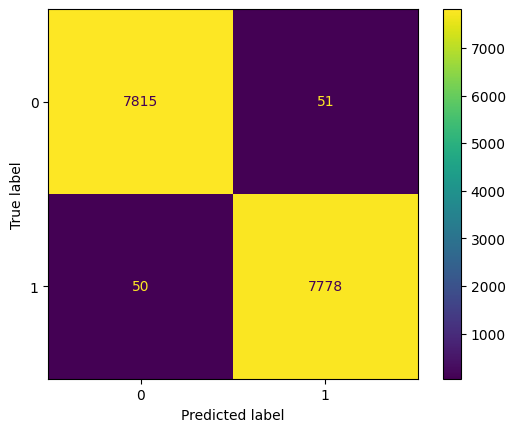

In [11]:
# create classifier object
mlp_tfidf_classifier = MLPClassifier(max_iter=1, random_state=42)

# train classifier
mlp_tfidf_classifier.fit(X_train_tfidf, y_train)

# test classifier
mlp_tfidf_predictions = mlp_tfidf_classifier.predict(X_test_tfidf)

# evaluate
evaluate(mlp_tfidf_predictions)

## Creating Treshold Evaluation

In [28]:
probabilities = mlp_tfidf_classifier.predict_proba(X_test_tfidf)

probabilities_0 = probabilities[:, 0]
probabilities_1 = probabilities[:, 1]

actual_values = y_test

probabilities_and_values_df = pd.DataFrame({
    'probabilities_0': probabilities_0,
    'probabilities_1': probabilities_1,
    'actual_values': actual_values
})

print(probabilities_and_values_df.shape)
print(probabilities_and_values_df.head(20))

(15694, 3)
       probabilities_0  probabilities_1  actual_values
30578         0.996920         0.003080              0
75285         0.007297         0.992703              1
47368         0.002008         0.997992              1
23969         0.994878         0.005122              0
53099         0.000355         0.999645              1
14076         0.999075         0.000925              0
20565         0.995986         0.004014              0
62974         0.002011         0.997989              1
55285         0.000257         0.999743              1
61165         0.008079         0.991921              1
49031         0.020530         0.979470              1
65834         0.010096         0.989904              1
64319         0.023647         0.976353              1
63695         0.005859         0.994141              1
77050         0.010139         0.989861              1
15197         0.995731         0.004269              0
9908          0.855172         0.144828              0

In [29]:
under_60_percent_df = probabilities_and_values_df[(probabilities_and_values_df['probabilities_0'] > 0.6) | (probabilities_and_values_df['probabilities_1'] > 0.60)]

print(under_60_percent_df.shape)
print(under_60_percent_df.head(20))

(15617, 3)
       probabilities_0  probabilities_1  actual_values
30578         0.996920         0.003080              0
75285         0.007297         0.992703              1
47368         0.002008         0.997992              1
23969         0.994878         0.005122              0
53099         0.000355         0.999645              1
14076         0.999075         0.000925              0
20565         0.995986         0.004014              0
62974         0.002011         0.997989              1
55285         0.000257         0.999743              1
61165         0.008079         0.991921              1
49031         0.020530         0.979470              1
65834         0.010096         0.989904              1
64319         0.023647         0.976353              1
63695         0.005859         0.994141              1
77050         0.010139         0.989861              1
15197         0.995731         0.004269              0
9908          0.855172         0.144828              0

In [34]:
thresholds = np.arange(0.5, 1.0, 0.01)

results = []

for threshold in thresholds:

    classifiable_df = probabilities_and_values_df[(probabilities_and_values_df['probabilities_0'] > threshold) | (probabilities_and_values_df['probabilities_1'] > threshold)]
    
    percentage_classifiable = (len(classifiable_df) / len(probabilities_and_values_df)) * 100
    
    predicted_labels = np.where(classifiable_df['probabilities_1'] > threshold, 1, 0)

    accuracy = accuracy_score(classifiable_df['actual_values'], predicted_labels) * 100
    precision = precision_score(classifiable_df['actual_values'], predicted_labels) * 100
    recall = recall_score(classifiable_df['actual_values'], predicted_labels) * 100
    f1 = f1_score(classifiable_df['actual_values'], predicted_labels) * 100

    results.append({
        'threshold': threshold,
        'classifiable': percentage_classifiable,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1
    })

results_df = pd.DataFrame(results)

print(results_df.head(50))

    threshold  classifiable   accuracy  precision      recall         f1
0        0.50    100.000000  99.356442  99.348576   99.361267  99.354921
1        0.51     99.923538  99.381456  99.373722   99.386425  99.380073
2        0.52     99.891678  99.394017  99.373562   99.411689  99.392622
3        0.53     99.878935  99.400319  99.386268   99.411689  99.398977
4        0.54     99.853447  99.412928  99.398823   99.424258  99.411539
5        0.55     99.815216  99.419087  99.398515   99.436692  99.417600
6        0.56     99.770613  99.425214  99.398284   99.449212  99.423742
7        0.57     99.706894  99.450409  99.397976   99.499936  99.448930
8        0.58     99.655919  99.462916  99.423225   99.499743  99.461469
9        0.59     99.617688  99.494691  99.448647   99.537988  99.493297
10       0.60     99.509367  99.526157  99.499358   99.550475  99.524910
11       0.61     99.458392  99.532321  99.499294   99.563207  99.531240
12       0.62     99.388301  99.538402  99.499037  